In [3]:
#load libraries
import pandas as pd
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import keras
import sklearn.feature_selection as skfs

In [4]:
#To normalize data
from sklearn.preprocessing import MinMaxScaler
#To encode
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
# Feature Importance
from sklearn import datasets
from sklearn import metrics
#Split data set
from sklearn.model_selection import train_test_split
#For KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
#Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix

In [5]:
# define column names
names = ['age', 'workclass', 'education', 'education-num', 'marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']

# loading training data (df = data frame)
df = pd.read_csv(r"C:\Users\Madhushi\Desktop\ML1_Assignment\Adult_Census_Income_Binary_Classification_dataset.csv", header=0, names=names, sep=',\s+', delimiter=',', encoding="utf-8", skipinitialspace=True)

#display first 3 rows of the data frame
df.head(3)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [6]:
#Pre processing 1 - Removing missing values start

#number of missing values in each column
(df[['age', 'workclass', 'education', 'education-num', 'marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']] == "?").sum()

age                  0
workclass         1836
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [7]:
# mark ? values as missing or NaN
df[['workclass', 'occupation','native-country']] = df[['workclass', 'occupation','native-country']].replace('?', np.NaN)

# count the number of NaN values in each column
df.isnull().sum()

# drop rows with missing values
df.dropna(inplace=True)

#removing missing values end

In [8]:
#Pre processing 2 - Binning Start(Continuous variables)

#Bin Age
bins = [0,10,20,30,40,50,60,70,80,90,100]
labels = [0,1,2,3,4,5,6,7,8,9]
df['age_binned'] = pd.cut(df['age'], bins=bins, labels=labels)
#df.assign(age_binned=df.groupby(pd.cut(df['age'], bins=bins, labels=labels))['age'].transform('age_binned'))

#Bin education number
bins = [0,5,10,15,20]
labels = [0,1,2,3]
df['education-num_binned'] = pd.cut(df['education-num'], bins=bins, labels=labels)

#Bin capital gain
#Those who have a capital gain will be marked as 1
bins = [-1,1,1000000]
labels = [0,1]
df['capital-gain_binned'] = pd.cut(df['capital-gain'], bins=bins, labels=labels)

#Bin capital loss
#Those who have a capital loss will be marked as 1
bins = [-1,1,1000000]
labels = [0,1]
df['capital-loss_binned'] = pd.cut(df['capital-loss'], bins=bins, labels=labels)

#Bin hours per week
bins = [0,10,20,30,40,50,60,70,80,90,100]
labels = [0,1,2,3,4,5,6,7,8,9]
df['hours-per-week_binned'] = pd.cut(df['hours-per-week'], bins=bins, labels=labels)

#Binning end
df.head(5)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,age_binned,education-num_binned,capital-gain_binned,capital-loss_binned,hours-per-week_binned
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,3,2,1,0,3
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,4,2,0,0,1
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,3,1,0,0,3
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,5,1,0,0,3
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,2,2,0,0,3


In [9]:
#Pre processinng 3 - Encoding Categorical Data

le=LabelEncoder()
# Iterating over all the common columns in train and test
for col in names:
       #Encoding only categorical variables
       if df[col].dtypes == 'object':
        #Using whole data to form an exhaustive list of levels
           le.fit(df[col].values)
           df[col]=le.transform(df[col])
            
df.head(3)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,age_binned,education-num_binned,capital-gain_binned,capital-loss_binned,hours-per-week_binned
0,39,5,9,13,4,0,1,4,1,2174,0,40,38,0,3,2,1,0,3
1,50,4,9,13,2,3,0,4,1,0,0,13,38,0,4,2,0,0,1
2,38,2,11,9,0,5,1,4,1,0,0,40,38,0,3,1,0,0,3


In [10]:
#Dividing into training and testing datasets start

# create design matrix X and target vector y
#X = np.array(df.loc['workclass', 'education', 'marital-status','occupation','relationship','race','sex','capital-gain','capital-loss', 'native-country', 'education-num_binned', 'age_binned', 'hours-per-week_binned'])
#y = np.array(df['income'])

y = df.income
X = df.drop(['income', 'age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week'], axis=1)

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) #, random_state=42

#Dividing into training and testing datasets end

In [11]:
#Preprocessing 4 - Feature Extraction


In [12]:
#Order of importance
#occupation, relationship, age_binned, marital-status, hours-per-week_binned, education-num_binned, education, capital-gain_binned, workclass, sex, native-country, capital-loss_binned, race

In [13]:
X.head(1)

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,age_binned,education-num_binned,capital-gain_binned,capital-loss_binned,hours-per-week_binned
0,5,9,4,0,1,4,1,38,3,2,1,0,3


In [14]:
################################################################################################
#KNN algorithm Using Python `sklearn' package start

#Instatiating Training and evaluating the model start

# instantiate learning model (k = 5)
knn = KNeighborsClassifier(n_neighbors=5)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
pred = knn.predict(X_test)

# evaluate accuracy
print(accuracy_score(y_test, pred))

0.8206431649906067


In [15]:
#Finding the optimal k start

# creating odd list of K for KNN
myList = list(range(1,20))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

The optimal number of neighbors is 15


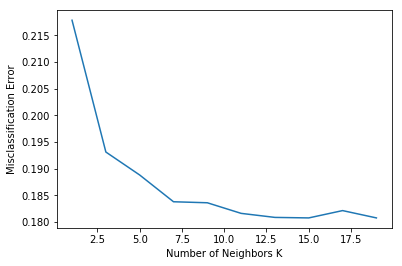

In [16]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

#Finding the optimal k end

In [17]:
#Re-evaluating with the optimal k start

# instantiate learning model (k = 15)
knn = KNeighborsClassifier(n_neighbors=15)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
pred = knn.predict(X_test)

# evaluate accuracy
print(accuracy_score(y_test, pred))

#Re-evaluating with the optimal k end

#KNN algorithm Using Python `sklearn' package end
################################################################################################

0.829373411426677
